In [5]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict


plt.style.use('ggplot')

## EDA on the book review dataset

In [13]:
df = pd.read_csv(
    '/../../../../df_sub.csv.gz', compression='gzip').astype(
    {'rating':'int8', 'total_votes': 'int32'})

In [14]:
df.head()

,reviewerId,asin,rating,summary,total_votes
0,A2S166WSCFIFP5,000100039X,5,close to god,2
1,AWLFVCT9128JV,000100039X,5,The Lessons Of Life,10
2,A2NHD7LUXVGTD3,000100039X,5,a beautiful poetic commentary on what it is to...,1
3,A1K1JW1C5CUSUZ,000100039X,5,Transcend Human Subjectivity to Find Godlike O...,4
4,A38AAPXSJN4C5G,000100039X,5,Inspired and Inspiring,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273661 entries, 0 to 273660
Data columns (total 5 columns):
reviewerId     273661 non-null object
asin           273661 non-null object
rating         273661 non-null int8
summary        273661 non-null object
total_votes    273661 non-null int32
dtypes: int32(1), int8(1), object(3)
memory usage: 7.6+ MB


In [16]:
df.describe(include='all')

,reviewerId,asin,rating,summary,total_votes
count,273661,273661,273661.000000,273661,273661.000000
unique,2647,10982,NaN,242483,NaN
top,AFVQZQ8PW0L,0439023483,NaN,Courtesy of Teens Read Too,NaN
freq,3108,478,NaN,341,NaN
mean,NaN,NaN,4.089158,NaN,7.690533
std,NaN,NaN,0.986875,NaN,41.105538
min,NaN,NaN,1.000000,NaN,0.000000
25%,NaN,NaN,4.000000,NaN,0.000000
50%,NaN,NaN,4.000000,NaN,2.000000
75%,NaN,NaN,5.000000,NaN,5.000000


### Plotting the distribution of ratings & votes

The ratings are quite skewed towards higher ratings (4/5) which would make harder to distinguish user preferences and potentially make it harder to calculate accurate user similarities.

In [27]:
df.rating.value_counts()

5    114599
4     95058
3     43562
2     14688
1      5754
Name: rating, dtype: int64

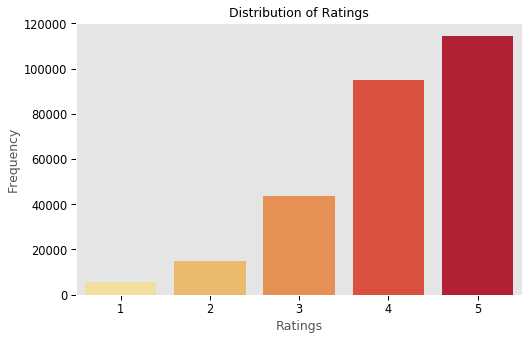

In [85]:
with sns.axes_style({'xtick.color':'black', 'ytick.color':'black', 'axes.grid' : False, 
                     'xtick.top': False, 'ytick.right': False}):
    sns.set_context("paper", font_scale=1.3)
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x = df.rating.value_counts().index, y=df.rating.value_counts().values, palette='YlOrRd')
    ax.set_xlabel('Ratings')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of Ratings')
    plt.show()
    #plt.savefig("/../../../pic.png", transparent=True)
    

Make sure to filter for helpful and total votes below 20 as there are a few outliers which massively skew the distribution and make it hard to visualise.

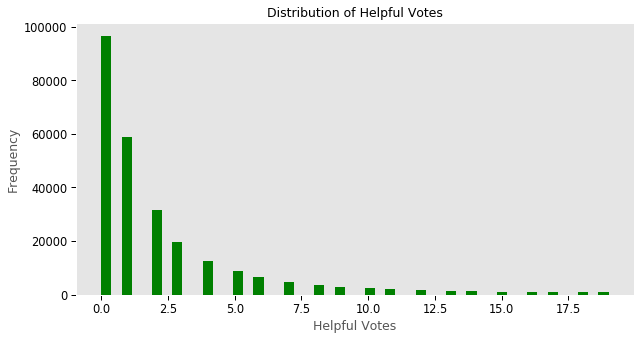

In [51]:
with sns.axes_style({'xtick.color':'black', 'ytick.color':'black', 'axes.grid' : False, 
                     'xtick.top': False, 'ytick.right': False}):
    sns.set_context("paper", font_scale=1.3)
    fig, ax = plt.subplots(figsize=(10,5))
    sns.distplot(df[df.pos_votes < 20]['pos_votes'], kde=False,
                 hist_kws={"rwidth":1, 'alpha':1.0}, color = 'g')
    ax.set_xlabel('Helpful Votes')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of Helpful Votes')
    plt.show()
    #plt.savefig("/../../../pic.png", transparent=True)
    

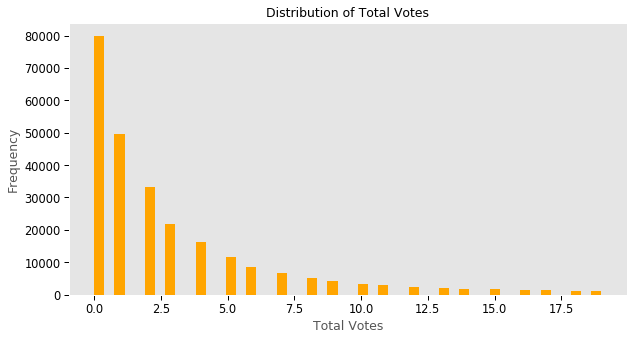

In [52]:
with sns.axes_style({'xtick.color':'black', 'ytick.color':'black', 'axes.grid' : False, 
                     'xtick.top': False, 'ytick.right': False}):
    sns.set_context("paper", font_scale=1.3)
    fig, ax = plt.subplots(figsize=(10,5))
    sns.distplot(df[df.total_votes < 20]['total_votes'], kde=False,
                 hist_kws={"rwidth":1, 'alpha':1.0}, color='orange')
    ax.set_xlabel('Total Votes')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of Total Votes')
    plt.show()
    #plt.savefig("/../../../pic.png", transparent=True)

### Checking votes for rating category

This shows that negative or lower rated reviews tend to get more attention (both in terms of likes and dislikes). This could put these reviews nearer the top which could misleading to some users on whether they might enjoy the book or not.

In [53]:
df.groupby('rating')['total_votes'].mean().reset_index()

,rating,total_votes
0,1,27.055787
1,2,11.875885
2,3,7.532712
3,4,4.665436
4,5,8.751036


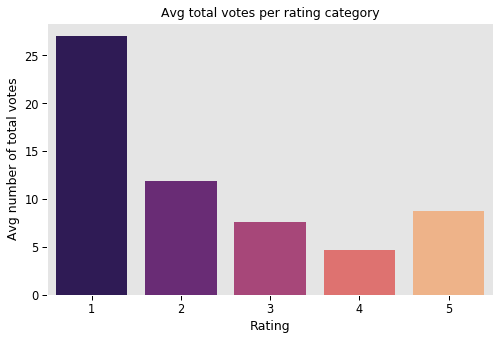

In [83]:
with sns.axes_style({'xtick.color':'black', 'ytick.color':'black', 'axes.grid' : False, 
                     'xtick.top': False, 'ytick.right': False}):
    sns.set_context("paper", font_scale=1.3)
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(y = 'total_votes', x = 'rating', data = df.groupby('rating')['total_votes'].mean().reset_index(), 
               palette='magma', ax=ax)
    plt.xlabel('Rating', color = 'k')
    plt.ylabel('Avg number of total votes', color = 'k')
    plt.title('Avg total votes per rating category')
    #plt.tight_layout()
    #plt.savefig("/../../../pic.png", transparent = True)

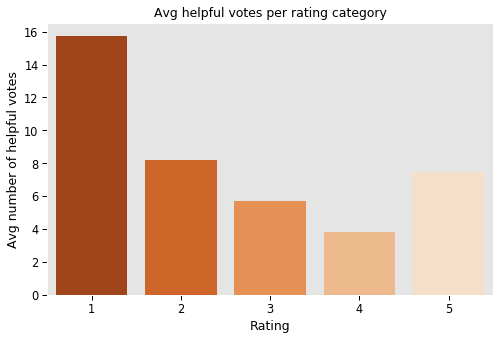

In [82]:
with sns.axes_style({'xtick.color':'black', 'ytick.color':'black', 'axes.grid' : False, 
                     'xtick.top': False, 'ytick.right': False}):
    sns.set_context("paper", font_scale=1.3)
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(y = 'pos_votes', x = 'rating', data = df.groupby('rating')['pos_votes'].mean().reset_index(), 
               palette='Oranges_r', ax=ax)
    plt.xlabel('Rating', color = 'k')
    plt.ylabel('Avg number of helpful votes', color = 'k')
    plt.title('Avg helpful votes per rating category')
    #plt.tight_layout()
    #plt.savefig("/../../../pic.png", transparent = True)

### Ratio of helpful votes to total votes

In [73]:
#Creating the ratio columning, making sure to account for the zeros in total_votes
df['ratio']=[x[0]/x[1] if x[1]!=0 else np.nan for x in zip(df.pos_votes, df.total_votes) ]

Most of the reviews tend to get almost all likes and very few dislikes.

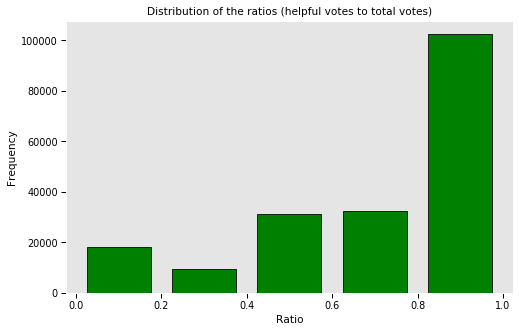

In [81]:
with sns.axes_style({'xtick.color':'black', 'ytick.color':'black', 'axes.grid' : False}):
    fig, ax = plt.subplots(figsize = (8,5))
    sns.distplot(df[(~df.ratio.isnull()) & (df.ratio < 1.7)].ratio, bins = 5, kde=False, color = 'g', hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})
    plt.xlabel('Ratio', color = 'k')
    plt.ylabel('Frequency', color = 'k')
    plt.title('Distribution of the ratios (helpful votes to total votes)')
    #plt.tight_layout()
    #plt.savefig("/../../../pic.png", transparent = True)

Observing the ratio for each rating category shows very little difference across the ratings; lower ratings do have marginally worse ratios which indicates lower ratings get more dislikes.

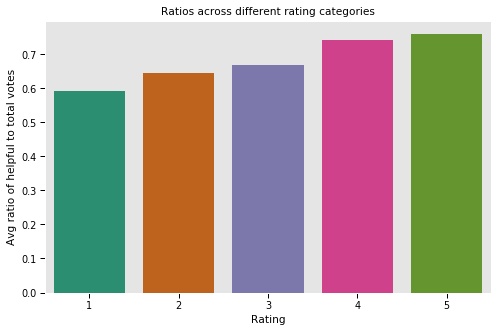

In [147]:
with sns.axes_style({'xtick.color':'black', 'ytick.color':'black', 'axes.grid' : False}):
    sns.set_context("paper", font_scale=1.1)
    fig, ax = plt.subplots(figsize = (8,5))
    sns.barplot(y = 'ratio', x = 'rating', data = df.groupby('rating')['ratio'].mean().reset_index(), palette='Dark2')
    plt.xlabel('Rating', color = 'k')
    plt.ylabel('Avg ratio of helpful to total votes', color = 'k')
    plt.title('Ratios across different rating categories')
    #plt.tight_layout()
    #plt.savefig("/../../../pic.png", transparent = True)

### Have people gotten meaner over time?


Quick analysis on how ratings have changed through the years. Note: I had to use a 4000 day rolling window as the jumps in mean ratings are quite messy and after trial and error this value seems to be optimal to smooth out the jumps.

In [30]:
df['time'] = pd.to_datetime(df['unixtime'],unit='s')
df.head()

,reviewerId,asin,rating,summary,unixtime,pos_votes,total_votes,ratio,time
0,A2S166WSCFIFP5,000100039X,5,close to god,1071100800,0,2,0.00,2003-12-11
1,AWLFVCT9128JV,000100039X,5,The Lessons Of Life,1136851200,8,10,0.80,2006-01-10
2,A2NHD7LUXVGTD3,000100039X,5,a beautiful poetic commentary on what it is to...,1344729600,1,1,1.00,2012-08-12
3,A1K1JW1C5CUSUZ,000100039X,5,Transcend Human Subjectivity to Find Godlike O...,980380800,3,4,0.75,2001-01-25
4,A38AAPXSJN4C5G,000100039X,5,Inspired and Inspiring,1400630400,0,0,NaN,2014-05-21


In [31]:
time_df = df[['time', 'rating']]
time_df = time_df.sort_values(by='time')
time_df.set_index('time', inplace=True, drop=True)
time_df.index.name = None
time_df.head()

,rating
1997-01-31,5
1997-03-25,1
1997-04-15,5
1997-04-21,5
1997-04-27,2


Interestingly, the ratings for books dropped pretty steeply in 2007-2008, around the time of the financial crash. Does this mean that economic and political climates have a massive impact of the ratings?

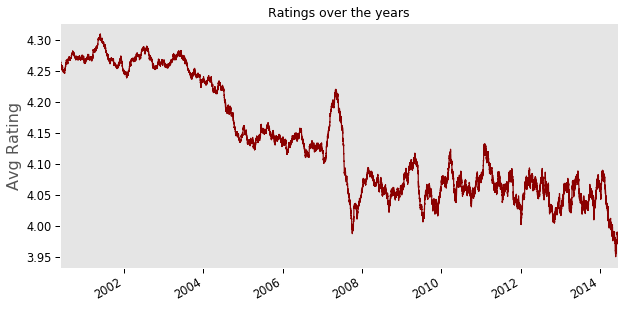

In [87]:
with sns.axes_style({'xtick.color':'black', 'ytick.color':'black', 'axes.grid' : False, 
                     'xtick.top': False, 'ytick.right': False}):
    time_df.rolling(window=4000, center=True).mean().dropna().plot(figsize = (10,5), color = 'darkred', legend=False)
    plt.ylabel('Avg Rating', fontsize=16)
    plt.title('Ratings over the years')
    #plt.tight_layout()
    #plt.savefig("/../../../pic.png", transparent = True)

## EDA on the book metadata

In [17]:
meta = pd.read_csv('/../../../meta_df_sub.csv.gz', compression = 'gzip', 
                  names = ['asin', 'title', 'desc', 'price', 'categories'])

In [18]:
meta.head()

,asin,title,desc,price,categories
0,000100039X,The Prophet,'Kahlil Gibran was among the most important Ar...,NaN,"'Literature & Fiction', 'Poetry'"
1,0002051850,For Whom the Bell Tolls,"'Shows some signs of wear, and may have some m...",17.64,"'Literature & Fiction', 'Classics'"
2,0002219417,The Winds of War,'A Masterpiece of Historical Fiction-The Great...,6.65,"'Literature & Fiction', 'Contemporary'"
3,0002242052,Without Remorse,"'Shows some signs of wear, and may have some m...",39.38,"'Literature & Fiction', 'Genre Fiction'"
4,0002247399,A Dance with Dragons,'Dance with the Dragons book',29.06,"'Science Fiction & Fantasy', 'Fantasy'"


In [19]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 5 columns):
asin          6982 non-null object
title         6982 non-null object
desc          6902 non-null object
price         6102 non-null float64
categories    6931 non-null object
dtypes: float64(1), object(4)
memory usage: 272.9+ KB


Taking a look through the category tags showed me that the categories were quite vague and broad. This would make any analysis using categories quite hard to draw results from. 

In [20]:
#leaning up the categories and condensing similar categories into one group
meta.categories = meta.categories.str.replace("'", "").str.replace('"', '').str.replace(
    "Thriller & Suspense", "Thrillers & Suspense").str.replace(
    "Mystery", "Thrillers & Suspense").str.split(',')

meta.categories = meta.categories.map(lambda x: [i.strip() for i in x] if type(x) == list else x)

In [21]:
#Seperating out the each category into a single row to make data analysis by category easier
meta = meta.set_index(['asin', 'title', 'desc', 'price']).explode(column = 'categories').reset_index()

In [22]:
#Obtaining the top 30 categories
grouped_cat = meta.groupby('categories')[['asin']].count().sort_values(by='asin', ascending = False)
grouped_cat[:30]

,asin
categories,
Thrillers & Suspense,2892
Literature & Fiction,2774
Genre Fiction,1125
Science Fiction & Fantasy,470
United States,450
Teen & Young Adult,381
Biographies & Memoirs,318
Christian Books & Bibles,225
Action & Adventure,220


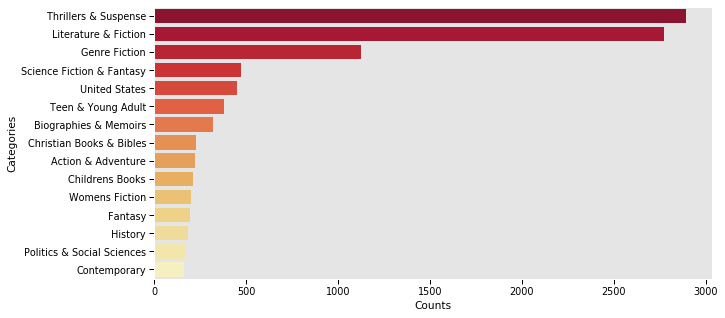

In [23]:
#Plotting the top 30 categories
with sns.axes_style({'xtick.color':'black', 'ytick.color':'black', 'axes.grid' : False, 'xtick.top': False, 'ytick.right': False}):
    sns.set_context("paper", font_scale=1.1)
    fig, ax = plt.subplots(figsize=(10,5))
    sns.barplot(y = 'categories', x = 'asin', data = grouped_cat[:15].reset_index(), orient='h', palette='YlOrRd_r')
    plt.xlabel('Counts', color = 'k')
    plt.ylabel('Categories', color = 'k')
    #plt.tight_layout()
    #plt.savefig("/../../../pic.png", transparent = True)

## Merging the book review and book metadata together

Note: Not all of the book asins have meta data, only 6982 books out of the 10982 books have metadata.

In [24]:
print(f'Number of unique books in book review dataset: {len(df.asin.unique())}')
print(f'Number of unique books in metadata: {len(meta.asin.unique())}')

Number of unique books in book review dataset: 10982
Number of unique books in metadata: 6982


In [25]:
#Merging the datasets
merged = df.merge(meta, on = 'asin', how='outer')

In [26]:
#Save this merged csv for use later on
merged.to_csv('/../../../merged.csv.gz', header=True, index=False,
             compression='gzip')

In [28]:
merged.tail()

,reviewerId,asin,rating,summary,total_votes,title,desc,price,categories
450934,A2G2PUX1JP4RZR,0578120763,4,4 stars - Written as a reflection of Quinn's ...,0,Stripped,"'', ''",9.79,Romance
450935,A2G2PUX1JP4RZR,0578120763,4,4 stars - Written as a reflection of Quinn's ...,0,Stripped,"'', ''",9.79,New Adult & College
450936,A3TGY3ANGBNK7C,0578122596,5,Reviewed for Cocktails and Books,1,Diamond Girl (G-Man),"'', '', 'Andrea Smith is a USA Today Best-Sell...",NaN,NaN
450937,A19UT0OPQCDR8,0578124114,4,"A Story of Broken Hearts, New Love, and Second...",0,The Do Over,'A.L. Zaun graduated from Florida Internationa...,15.33,Literature & Fiction
450938,A19UT0OPQCDR8,0578124114,4,"A Story of Broken Hearts, New Love, and Second...",0,The Do Over,'A.L. Zaun graduated from Florida Internationa...,15.33,Literary


### Rating across the top 30 categories

Given that the ratings are very skewed to 4/5, the categories are broad and in some cases haven't been tagged accurately, its hard to see a real difference across the ratings in different categories.

In [137]:
grouped_rating = merged[merged.categories.isin(grouped_cat[:30].index)].groupby('categories')[['rating']].mean()
grouped_rating

,rating
categories,
Action & Adventure,4.017208
Americas,4.293750
Arts & Literature,4.209795
Biographies & Memoirs,4.225139
Business & Money,4.195997
Childrens Books,4.252735
Christian Books & Bibles,4.178243
Christian Living,4.170290
Contemporary,4.007069


### Correlation heatmap across numerical variables

I wanted to check in particular if there was any interesting correlation between rating and price, but there was very little correlation between variables, expect for pos_votes and total_votes which made sense.

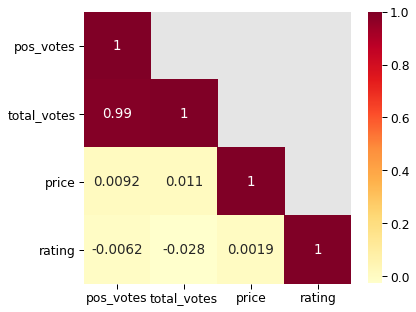

In [142]:
with sns.axes_style({'xtick.color':'black', 'ytick.color':'black', 'axes.grid' : False, 
                     'xtick.top': False, 'ytick.right': False}):
    sns.set_context("paper", font_scale=1.4)
    merged_corr = merged[['pos_votes',
                          'total_votes', 'price', 'rating']].corr()
    fig, ax = plt.subplots(figsize=(6,5))
    mask = np.zeros_like(merged_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, k=1)] = True
    sns.heatmap(merged_corr, mask=mask, annot=True, ax=ax, cmap='YlOrRd')
    #plt.tight_layout()
    #plt.savefig("/../../../pic.png", transparent = True)